# Exploratory Data Analysis



## <font color='red'>CREATE SUMMARY</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from ipywidgets import interact
%matplotlib inline

In [2]:
# Option to display full float formats instead of scientific notation
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Load full database
df = pickle.load(open("../data/dataset_consolidated.p", "rb"))
# df.to_csv('fall_detection.csv',sep=',')

In [5]:
#df.trial_subtype = np.where(df.trial_subtype == 'CS', 'ITCS', df.trial_subtype)

In [6]:
# Load metadata
meta = pickle.load(open("../data/metadata.p", "rb"))

In [7]:
# meta.to_csv('metadata.csv', index=False)

In [8]:
import warnings
warnings.filterwarnings("ignore")

### Data at first sight

Here is an excerpt of the the data description from the file README.txt:

* Dataset Description: Inertial Measurement Unit Fall Detection Dataset (IMU Dataset)

* IMU Dataset is a dataset devised to benchmark fall detection and prediction algorithms based on <font color='red'>**acceleration, angular velocity and magnetic fields**</font> of body-worn APDM Opal IMU sensors at 7 body locations (right ankle, left ankle, right thigh, left thigh, head, sternum, and waist).

* Each one of the 10 subject underwent 60 trials (15 Activity of Daily Livings - ADLs, 24 Falls, and 15 Near Falls)

#### Dataset columns
- Time: timestamp (the number of microseconds that has elapsed since 1 January 1970), unit = uS
- r.ankle Acceleration X (m/s^2): Right ankle's acceleration along X axis, unit = m/s^2
- r.ankle Acceleration Y (m/s^2): Right ankle's acceleration along Y axis, unit = m/s^2
- r.ankle Acceleration Z (m/s^2): Right ankle's acceleration along Z axis, unit = m/s^2
- r.ankle Angular Velocity X (rad/s): Right ankle's angular velocity along X axis, unit = rad/s
- r.ankle Angular Velocity Y (rad/s): Right ankle's angular velocity along Y axis, unit = rad/s
- r.ankle Angular Velocity Z (rad/s): Right ankle's angular velocity along Z axis, unit = rad/s
- r.ankle Magnetic Field X (uT): Right ankle's magnetic field along X axis, unit = uT
- r.ankle Magnetic Field Y (uT): Right ankle's magnetic field along Y axis, unit = uT
- r.ankle Magnetic Field Z (uT): Right ankle's magnetic field along Z axis, unit = uT
- l.ankle Acceleration X (m/s^2): Left ankle's acceleration along X axis, unit = m/s^2
- l.ankle Acceleration Y (m/s^2): Left ankle's acceleration along Y axis, unit = m/s^2
- l.ankle Acceleration Z (m/s^2): Left ankle's acceleration along Z axis, unit = m/s^2
- l.ankle Angular Velocity X (rad/s): Left ankle's angular velocity along X axis, unit = rad/s
- l.ankle Angular Velocity Y (rad/s): Left ankle's angular velocity along Y axis, unit = rad/s
- l.ankle Angular Velocity Z (rad/s): Left ankle's angular velocity along Z axis, unit = rad/s
- l.ankle Magnetic Field X (uT): Left ankle's magnetic field along X axis, unit = uT
- l.ankle Magnetic Field Y (uT): Left ankle's magnetic field along Y axis, unit = uT
- l.ankle Magnetic Field Z (uT): Left ankle's magnetic field along Z axis, unit = uT
- r.thigh Acceleration X (m/s^2): Right thigh's acceleration along X axis, unit = m/s^2
- r.thigh Acceleration Y (m/s^2): Right thigh's acceleration along Y axis, unit = m/s^2
- r.thigh Acceleration Z (m/s^2): Right thigh's acceleration along Z axis, unit = m/s^2
- r.thigh Angular Velocity X (rad/s): Right thigh's angular velocity along X axis, unit = rad/s
- r.thigh Angular Velocity Y (rad/s): Right thigh's angular velocity along Y axis, unit = rad/s
- r.thigh Angular Velocity Z (rad/s): Right thigh's angular velocity along Z axis, unit = rad/s
- r.thigh Magnetic Field X (uT): Right thigh's magnetic field along X axis, unit = uT
- r.thigh Magnetic Field Y (uT): Right thigh's magnetic field along Y axis, unit = uT
- r.thigh Magnetic Field Z (uT): Right thigh's magnetic field along Z axis, unit = uT
- l.thigh Acceleration X (m/s^2): Left thigh's acceleration along X axis, unit = m/s^2
- l.thigh Acceleration Y (m/s^2): Left thigh's acceleration along Y axis, unit = m/s^2
- l.thigh Acceleration Z (m/s^2): Left thigh's acceleration along Z axis, unit = m/s^2
- l.thigh Angular Velocity X (rad/s): Left thigh's angular velocity along X axis, unit = rad/s
- l.thigh Angular Velocity Y (rad/s): Left thigh's angular velocity along Y axis, unit = rad/s
- l.thigh Angular Velocity Z (rad/s): Left thigh's angular velocity along Z axis, unit = rad/s
- l.thigh Magnetic Field X (uT): Left thigh's magnetic field along X axis, unit = uT
- l.thigh Magnetic Field Y (uT): Left thigh's magnetic field along Y axis, unit = uT
- l.thigh Magnetic Field Z (uT): Left thigh's magnetic field along Z axis, unit = uT
- head Acceleration X (m/s^2): Head's acceleration along X axis, unit = m/s^2
- head Acceleration Y (m/s^2): Head's acceleration along Y axis, unit = m/s^2
- head Acceleration Z (m/s^2): Head's acceleration along Z axis, unit = m/s^2
- head Angular Velocity X (rad/s): Head's angular velocity along X axis, unit = rad/s
- head Angular Velocity Y (rad/s): Head's angular velocity along Y axis, unit = rad/s
- head Angular Velocity Z (rad/s): Head's angular velocity along Z axis, unit = rad/s
- head Magnetic Field X (uT): Head's magnetic field along X axis, unit = uT
- head Magnetic Field Y (uT): Head's magnetic field along Y axis, unit = uT
- head Magnetic Field Z (uT): Head's magnetic field along Z axis, unit = uT
- sternum Acceleration X (m/s^2): Sternum's acceleration along X axis, unit = m/s^2
- sternum Acceleration Y (m/s^2): Sternum's acceleration along Y axis, unit = m/s^2
- sternum Acceleration Z (m/s^2): Sternum's acceleration along Z axis, unit = m/s^2
- sternum Angular Velocity X (rad/s): Sternum's angular velocity along X axis, unit = rad/s
- sternum Angular Velocity Y (rad/s): Sternum's angular velocity along Y axis, unit = rad/s
- sternum Angular Velocity Z (rad/s): Sternum's angular velocity along Z axis, unit = rad/s
- sternum Magnetic Field X (uT): Sternum's magnetic field along X axis, unit = uT
- sternum Magnetic Field Y (uT): Sternum's magnetic field along Y axis, unit = uT
- sternum Magnetic Field Z (uT): Sternum's magnetic field along Z axis, unit = uT
- waist Acceleration X (m/s^2): Waist's acceleration along X axis, unit = m/s^2
- waist Acceleration Y (m/s^2): Waist's acceleration along Y axis, unit = m/s^2
- waist Acceleration Z (m/s^2): Waist's acceleration along Z axis, unit = m/s^2
- waist Angular Velocity X (rad/s): Waist's angular velocity along X axis, unit = rad/s
- waist Angular Velocity Y (rad/s): Waist's angular velocity along Y axis, unit = rad/s
- waist Angular Velocity Z (rad/s): Waist's angular velocity along Z axis, unit = rad/s
- waist Magnetic Field X (uT): Waist's magnetic field along X axis, unit = uT
- waist Magnetic Field Y (uT): Waist's magnetic field along Y axis, unit = uT
- waist Magnetic Field Z (uT): Waist's magnetic field along Z axis, unit = uT

#### Units
- Aceleration: $m/s^2$
- Angular Velocity: rad/s
- Magnectic Field: uT

#### Notes
- The columns below were included to improve the analysis and are not from the original dataset:
    * **time_datetime:** represent the currect date and time of the measure
    * **time_seconds:** XXXXXXXXXXXXXXXXXXXXX
    * **subject:** subject (student with sensors) who executed the moviments to collect the data
    * **trial_type:** ADL, Fall or NonFall
    * **trial_num:** trial number executed by the subject
    * **trial_subtype:** type of movement of the trial: standing still, picking object from the floor, etc.
    * **FileName:** name of the Excel file with original data
    * **target:** classification as fall (1) or non fall (0)


<hr>

### Overview of the dataset

In [ ]:
df.info()

<font color='red'>WRITE SOME CONCLUSIONS</font>

In [ ]:
df.describe()

<font color='red'>WRITE SOME CONCLUSIONS</font>

<hr>

### Checking the distribution of the types of trials

In [ ]:
dist = df.trial_type.value_counts()
fig, ax = plt.subplots()
dist.plot(kind='bar',ax=ax)
plt.xticks(rotation=0)
ax.set_ylabel('Qtd of measurements')

#### Conclusion:

Classes may be unbalanced. During the model training we could try also balance the data.


<hr>

### Checking duplicates

In [ ]:
print('Before: ',df.shape)
df = df.drop_duplicates()
print('After:  ', df.shape)

#### Conclusion: 

No duplicates

<hr>

## SubTypes dictionary

In [9]:
subtype_dict = {
            'AS'   : 'ascending stairs', 
            'DS'   : 'descending stairs', 
            'DSL'  : 'descending from standing to lying', 
            'DSS'  : 'descending from standing to sitting', 
            'HB'   : 'hit and bump by another person', 
            'ITCS' : 'incorrect shift of bodyweight due to misstep',
            'ITDS' : 'incorrect shift of bodyweight while descending', 
            'ITRS' : 'incorrect shift of bodyweight while rising from a chair', 
            'LCC'  : 'loss/colapse of consciousness', 
            'NW'   : 'normal walking', 
            'POG'  : 'picking object from the ground', 
            'RSS'  : 'rising from sitting', 
            'slip' : 'slips', 
            'SQ'   : 'standing quietly', 
            'trip' : 'trip'
    }

In [ ]:
# save the dict in a Pickle file
# pickle.dump(subtype_dict, open("../data/subtypes_dictionary.p", "wb"))

# Combination of the trials

In [10]:
df_conbination_trials = df[['trial_type','trial_subtype','trial_num']].drop_duplicates()
df_conbination_subjects = df[['trial_type','trial_subtype','subject']].drop_duplicates()

df_conbination_trials['trial_subtype_desc'] = df_conbination_trials.trial_subtype.apply(lambda x: subtype_dict[x])
df_conbination_subjects['trial_subtype_desc'] = df_conbination_subjects.trial_subtype.apply(lambda x: subtype_dict[x])

df_conbination_trials = df_conbination_trials.groupby(['trial_type','trial_subtype', 'trial_subtype_desc']).count()
df_conbination_subjects = df_conbination_subjects.groupby(['trial_type','trial_subtype', 'trial_subtype_desc']).count()

df_conbination = df_conbination_trials.join(df_conbination_subjects)

df_conbination.rename({'trial_num':'number of trials', 'subject':'number of subjects'},axis=1)

number of trials  \
trial_type trial_subtype trial_subtype_desc                                                     
ADLs       AS            ascending stairs                                                   3   
           DS            descending stairs                                                  3   
           DSL           descending from standing to lying                                  3   
           DSS           descending from standing to sitting                                3   
           NW            normal walking                                                     3   
           POG           picking object from the ground                                     3   
           RSS           rising from sitting                                                3   
           SQ            standing quietly                                                   3   
Falls      HB            hit and bump by another person                                     3   
           ITCS          incorrect shift of bodyweight due to misstep                       3   
           ITDS          incorrect shift of bodyweight while descending                     3   
           ITRS          incorrect shift of bodyweight while rising from...                 3   
           LCC           loss/colapse of consciousness                                      3   
           slip          slips                                                              3   
           trip          trip                                                               3   
Near_Falls HB            hit and bump by another person                                     3   
           ITCS          incorrect shift of bodyweight due to misstep                       3   
           ITRS          incorrect shift of bodyweight while rising from...                 3   
           slip          slips                                                              3   
           trip          trip                                                               3   

                                                                             number of subjects  
trial_type trial_subtype trial_subtype_desc                                                      
ADLs       AS            ascending stairs                                                    10  
           DS            descending stairs                                                   10  
           DSL           descending from standing to lying                                   10  
           DSS           descending from standing to sitting                                 10  
           NW            normal walking                                                      10  
           POG           picking object from the ground                                      10  
           RSS           rising from sitting                                                 10  
           SQ            standing quietly                                                    10  
Falls      HB            hit and bump by another person                                      10  
           ITCS          incorrect shift of bodyweight due to misstep                        10  
           ITDS          incorrect shift of bodyweight while descending                      10  
           ITRS          incorrect shift of bodyweight while rising from...                  10  
           LCC           loss/colapse of consciousness                                       10  
           slip          slips                                                               10  
           trip          trip                                                                10  
Near_Falls HB            hit and bump by another person                                      10  
           ITCS          incorrect shift of bodyweight due to misstep                        10  
           ITRS          incorrect shift of bodyweight while rising from...     

# Results of trials

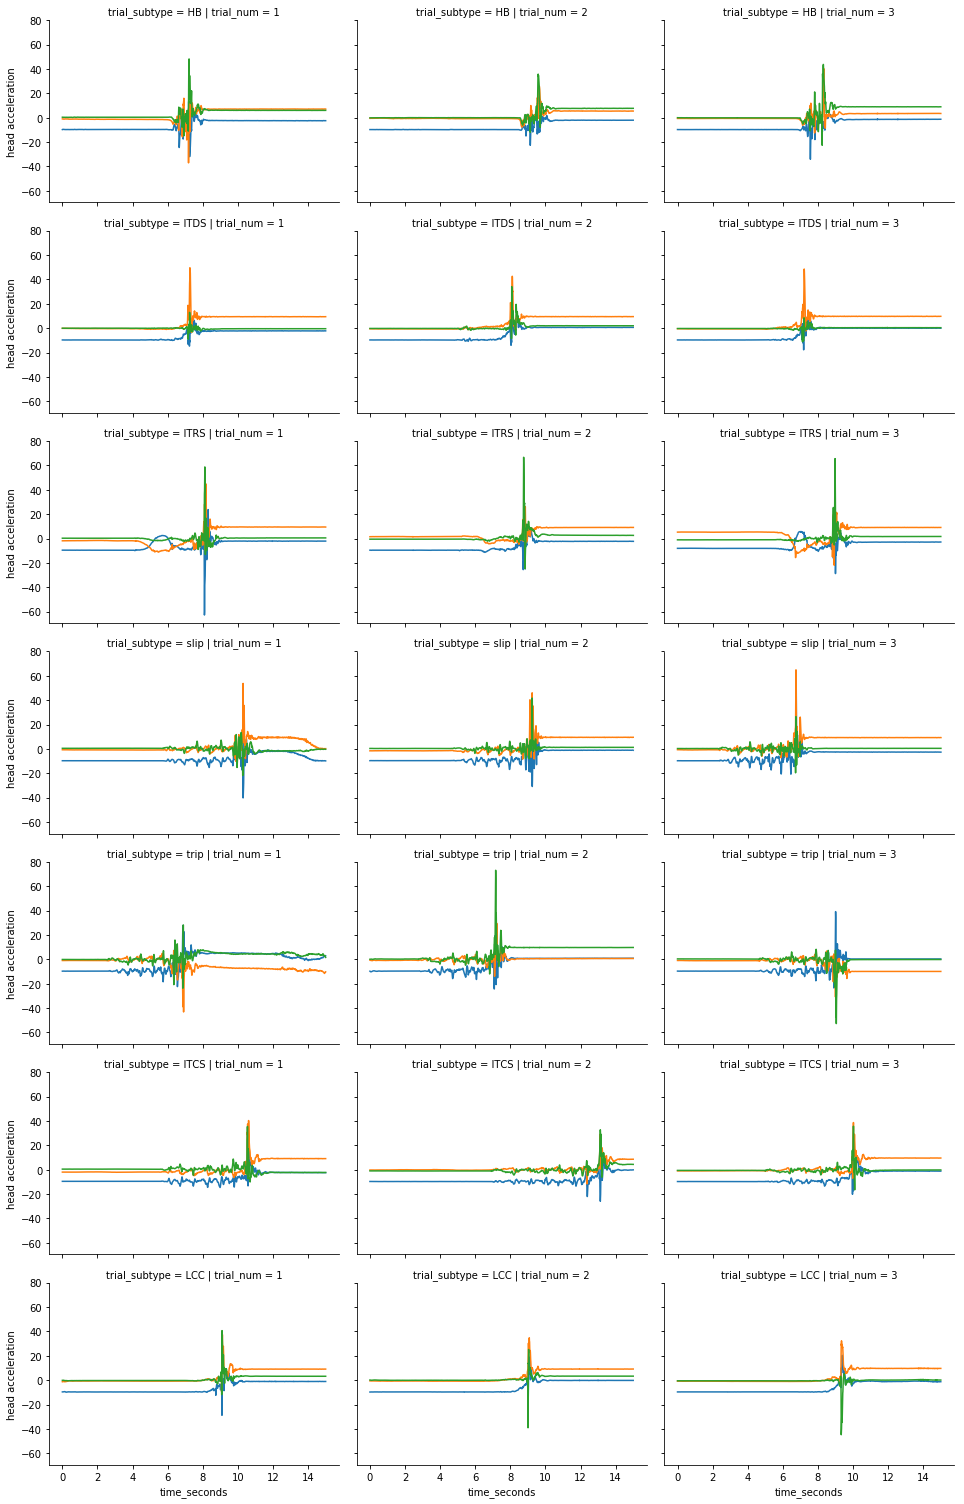

In [11]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
    
def plot_facedgrid_by_trial_type(df, trial_type, subject=1, location='waist', measure='acceleration'):

    body_location_columns = list(meta[(meta.body_location==location) & (meta.measure == measure)].index) 

    df_graph = df[(df.trial_type == trial_type) &
       (df.subject == subject)]
    
    df_body = df_graph[['time_seconds','trial_subtype', 'trial_num']+body_location_columns]

    df_body_X = df_graph[['time_seconds','trial_subtype', 'trial_num']+[body_location_columns[0]]]
    df_body_X.rename(columns={body_location_columns[0] : str(location + ' ' + measure)},inplace=True)
    df_body_X['axis'] = 'x'

    df_body_Y = df_graph[['time_seconds','trial_subtype', 'trial_num']+[body_location_columns[1]]]
    df_body_Y.rename(columns={body_location_columns[1] : str(location + ' ' + measure)},inplace=True)
    df_body_Y['axis'] = 'y'

    df_body_Z = df_graph[['time_seconds','trial_subtype', 'trial_num']+[body_location_columns[2]]]
    df_body_Z.rename(columns={body_location_columns[2] : str(location + ' ' + measure)},inplace=True)
    df_body_Z['axis'] = 'z'

    df_body = pd.concat([df_body_X, df_body_Y, df_body_Z])
    
    df_body = df_body[['time_seconds']+[str(location + ' ' + measure)]+['trial_subtype', 'trial_num', 'axis']]
    df_body.sort_values(['trial_num'],inplace=True)

    g = sns.FacetGrid(df_body.sort_values(['time_seconds','trial_num']), 
#                       sharex=False, sharey=False,
                      col="trial_num", row='trial_subtype', hue='axis',size=3, aspect=1.5) 
    g = g.map_dataframe(dateplot, "time_seconds", str(location + ' ' + measure))
    
#change the parameters according with the values above
plot_facedgrid_by_trial_type(df, trial_type='Falls', subject=1, location='head', measure='acceleration')    

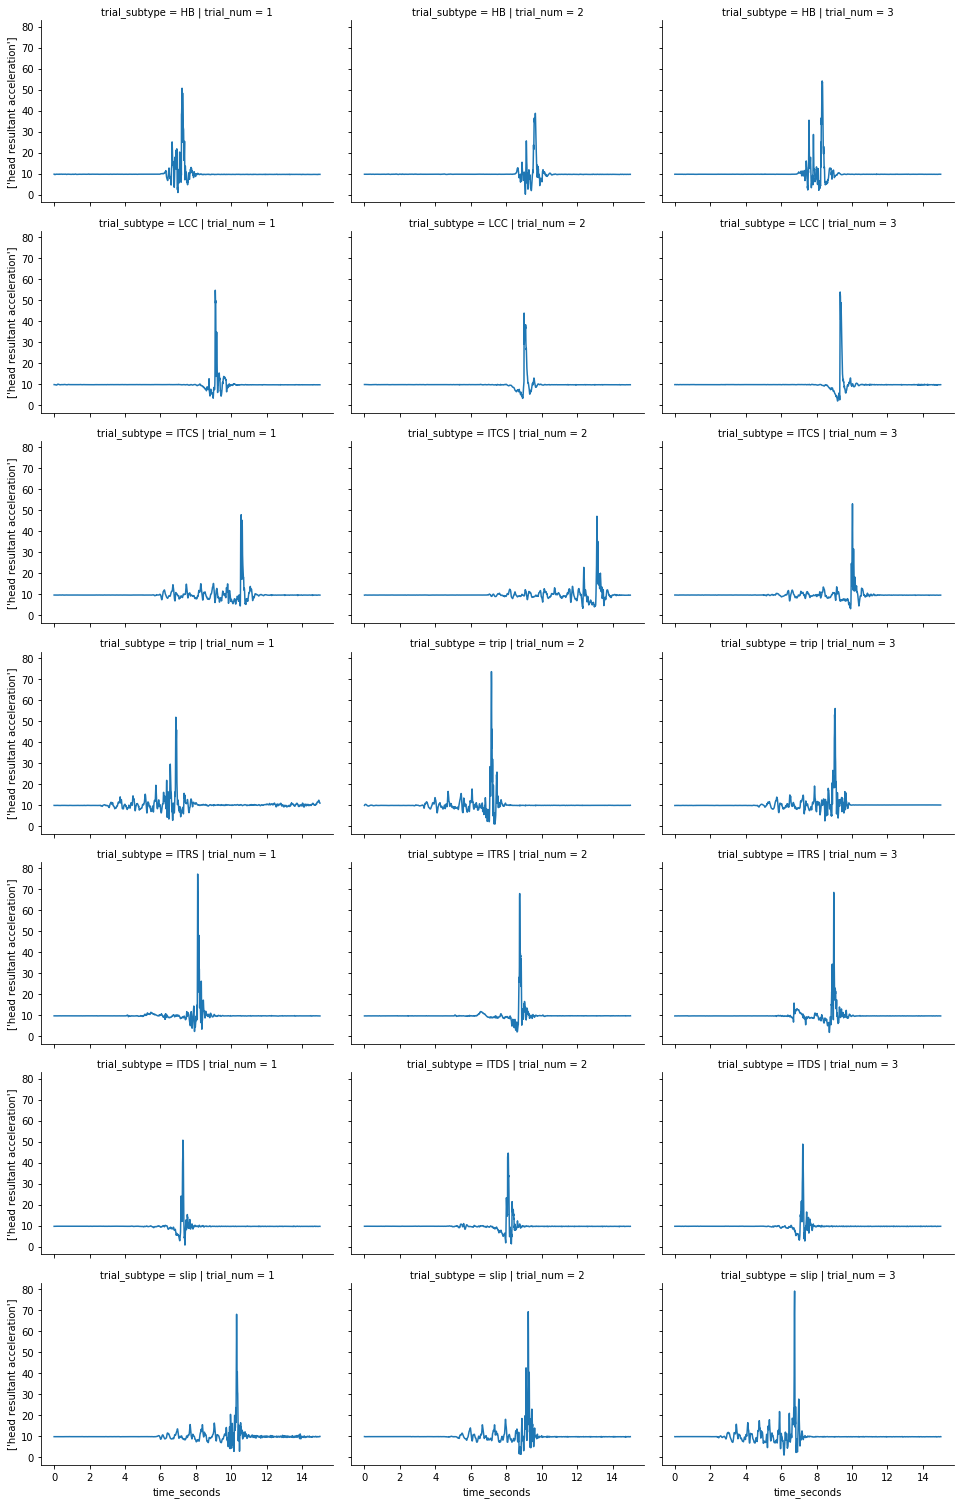

In [12]:
# plot the same graphics as above, but using the resultant measure instead of the X, Y, Z readings
def plot_facedgrid_by_resultant_values(df, trial_type, subject=1, location='waist', measure='acceleration'):

    body_location_columns = [str(location + ' resultant ' + measure)]

    df_graph = df[(df.trial_type == trial_type) &
       (df.subject == subject)][['time_seconds','trial_subtype', 'trial_num']+body_location_columns]

    g = sns.FacetGrid(df_graph.sort_values(['time_seconds','trial_num']), 
                      col="trial_num", row='trial_subtype',
#                       sharex=False, sharey=False,
                      size=3, aspect=1.5) 
    g = g.map_dataframe(dateplot, "time_seconds", body_location_columns)
    
#change the parameters according with the values above
plot_facedgrid_by_resultant_values(df, trial_type='Falls', subject=1, location='head', measure='acceleration')   

# Multivariate feature analysis

### Correlation among sensor readings

In [18]:
def plot_correlation_heatmap(df, columns, threshold):
    df = df[columns].corr()
    plt.figure(figsize=(24,18))
    sns.heatmap(df[(df >= threshold)],
            cmap='viridis', linewidths=0.01, annot=True)
    return df

In [16]:
threshold_correlation_raw_measures = 0.3
numerical_columns_raw = list(meta[(meta.body_location != '') & (meta.axis != 'XYZ')].index) + ['target']

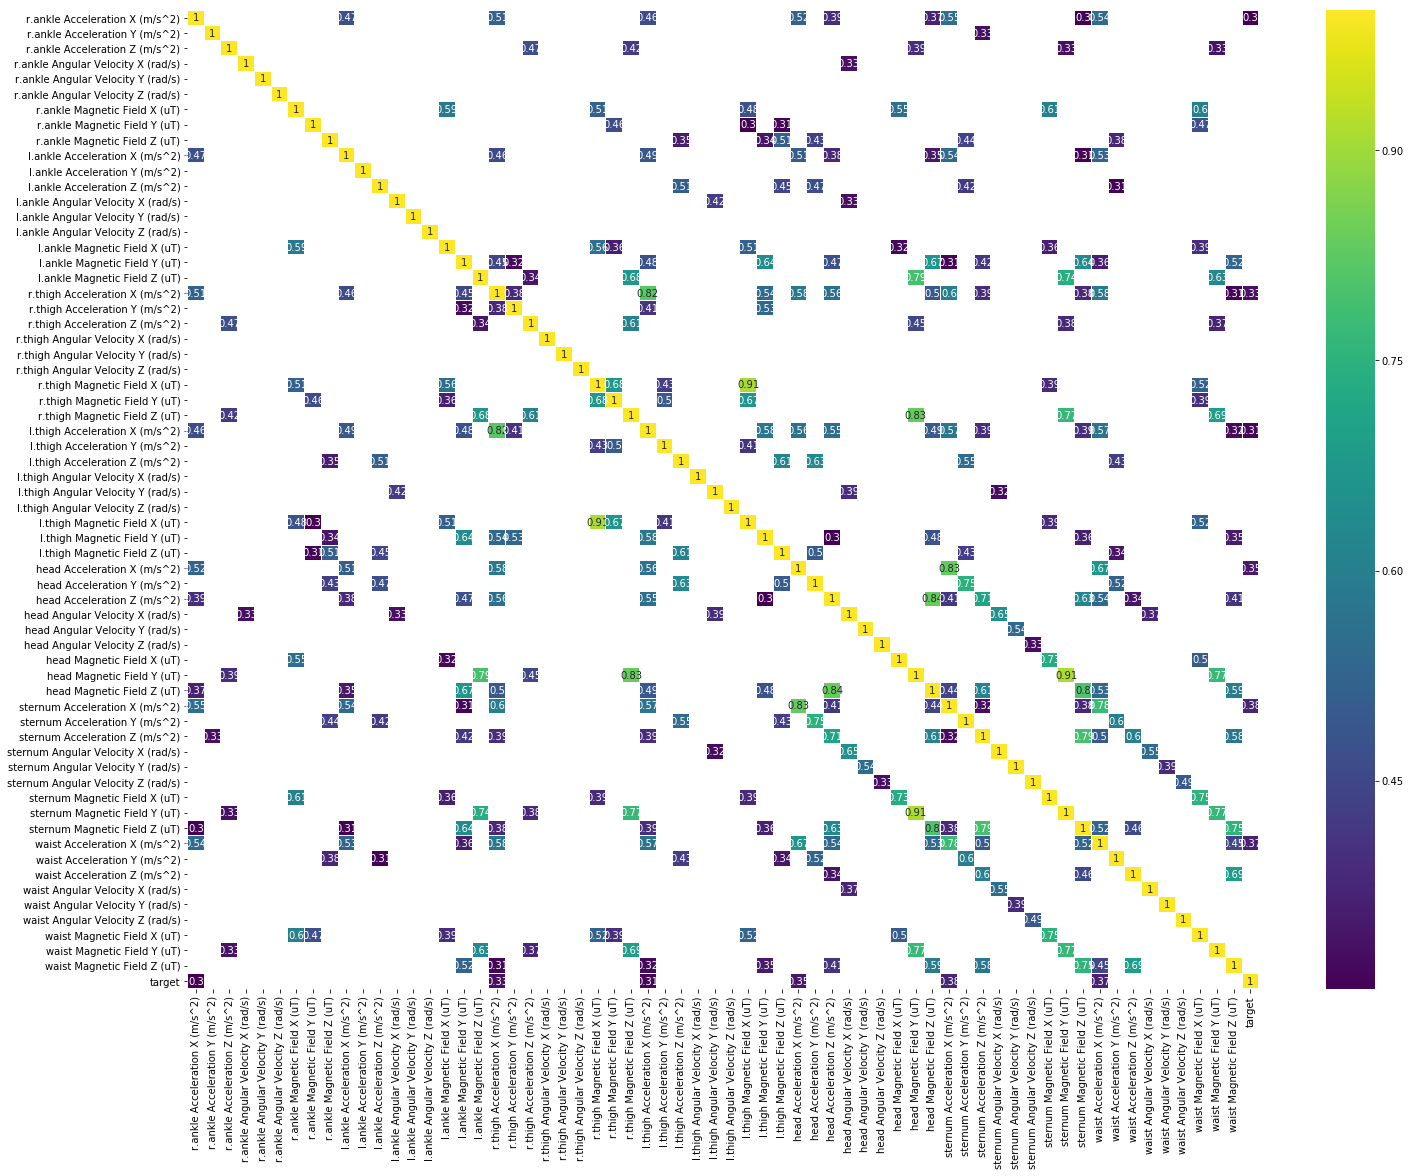

In [19]:
df_corr_raw = plot_correlation_heatmap(df, numerical_columns_raw, threshold_correlation_raw_measures)

### List of measures whose correlation with target is larger than threshold:

In [20]:
best_corr_raw_measures = list(df_corr_raw[(df_corr_raw >= threshold_correlation_raw_measures)]['target'].dropna().drop('target').index)

print("Readings with HIGHEST correlation with target:")
      
for measure in best_corr_raw_measures:
    print(' - '+measure)

Readings with HIGHEST correlation with target:
 - r.ankle Acceleration X (m/s^2)
 - r.thigh Acceleration X (m/s^2)
 - l.thigh Acceleration X (m/s^2)
 - head Acceleration X (m/s^2)
 - sternum Acceleration X (m/s^2)
 - waist Acceleration X (m/s^2)


### List of wrost correlated features:

In [21]:
wrost_corr_raw_measures = list(df_corr_raw.target.sort_values().head(6).index)

print("Readings with LOWEST correlation with target:")
      
for measure in wrost_corr_raw_measures:
    print(' - '+measure)

Readings with LOWEST correlation with target:
 - waist Magnetic Field X (uT)
 - sternum Magnetic Field X (uT)
 - r.ankle Magnetic Field X (uT)
 - r.thigh Magnetic Field X (uT)
 - l.thigh Magnetic Field X (uT)
 - head Magnetic Field X (uT)


## Individual correlations with target

#### Best correlations with target

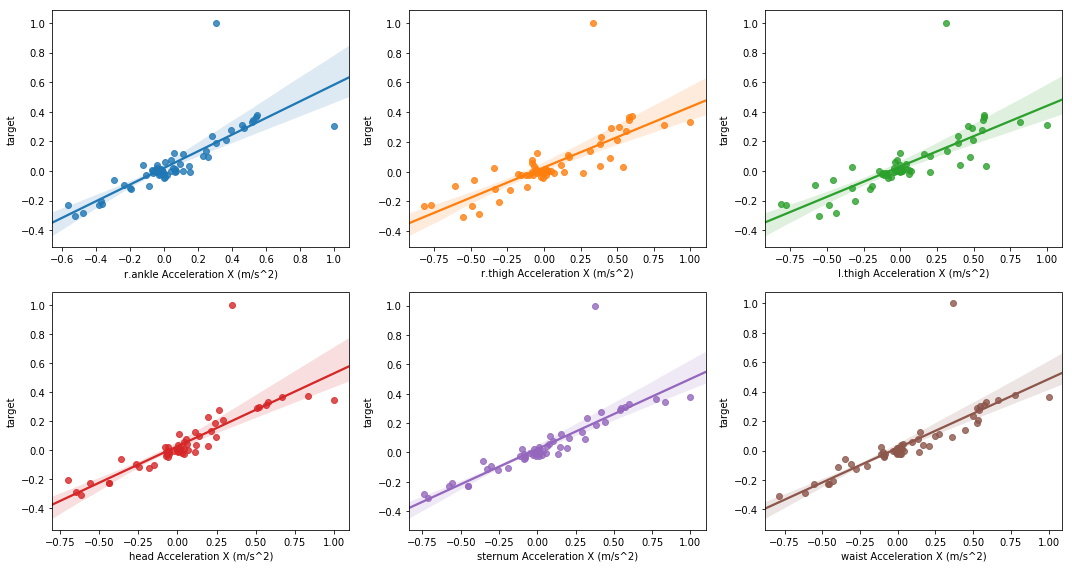

In [22]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(15,8))
sns.regplot(df_corr_raw[best_corr_raw_measures[0]],df_corr_raw.target, ax=ax1)
sns.regplot(df_corr_raw[best_corr_raw_measures[1]],df_corr_raw.target, ax=ax2)
sns.regplot(df_corr_raw[best_corr_raw_measures[2]],df_corr_raw.target, ax=ax3)
sns.regplot(df_corr_raw[best_corr_raw_measures[3]],df_corr_raw.target, ax=ax4)
sns.regplot(df_corr_raw[best_corr_raw_measures[4]],df_corr_raw.target, ax=ax5)
sns.regplot(df_corr_raw[best_corr_raw_measures[5]],df_corr_raw.target, ax=ax6)
plt.tight_layout()

#### Wrost correlations with target

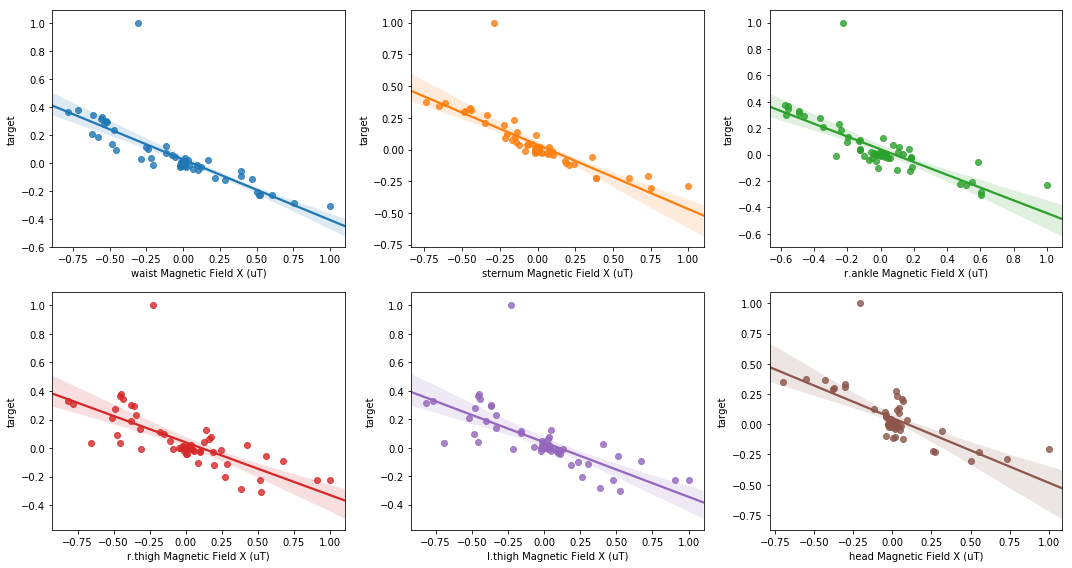

In [23]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(15,8))
sns.regplot(df_corr_raw[wrost_corr_raw_measures[0]],df_corr_raw.target, ax=ax1)
sns.regplot(df_corr_raw[wrost_corr_raw_measures[1]],df_corr_raw.target, ax=ax2)
sns.regplot(df_corr_raw[wrost_corr_raw_measures[2]],df_corr_raw.target, ax=ax3)
sns.regplot(df_corr_raw[wrost_corr_raw_measures[3]],df_corr_raw.target, ax=ax4)
sns.regplot(df_corr_raw[wrost_corr_raw_measures[4]],df_corr_raw.target, ax=ax5)
sns.regplot(df_corr_raw[wrost_corr_raw_measures[5]],df_corr_raw.target, ax=ax6)
plt.tight_layout()

**Conclusion:** these 6 wrost measures have **<font color='red'>negative</font> correlations**

# Resultant measures
### Correlation among sensor **resultant** calculations

In [25]:
numerical_columns_resultant = list(meta[meta.axis == 'XYZ'].index) + ['target']
threshold_correlation_resultant_measures = 0.1

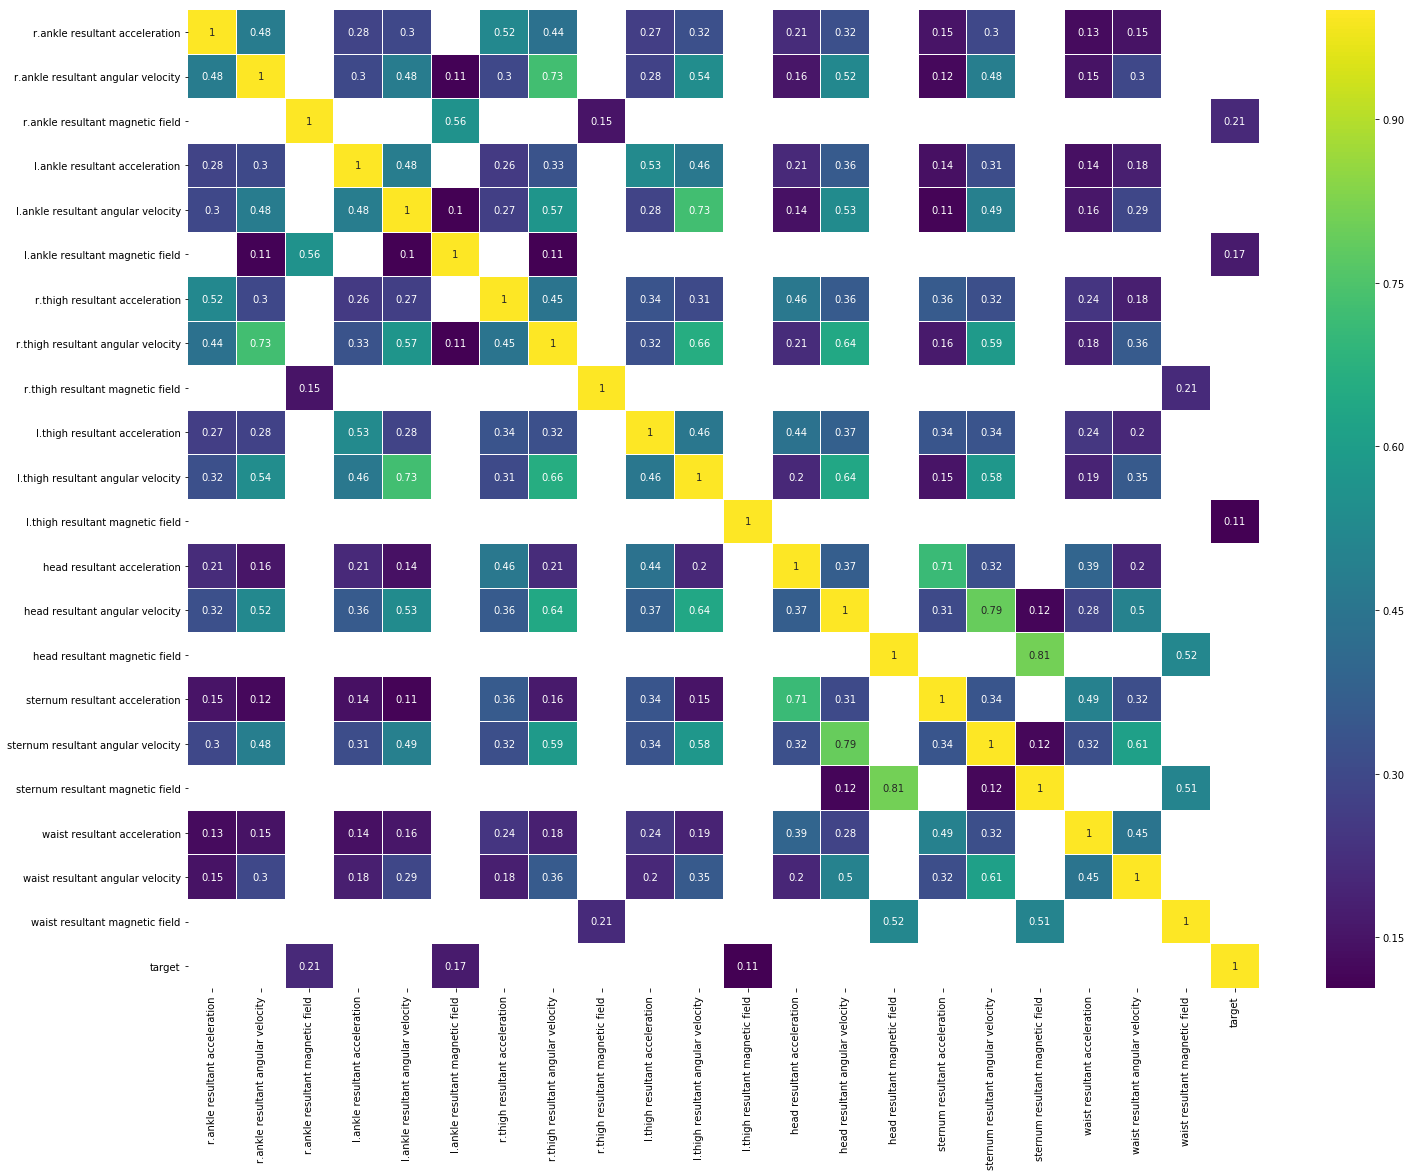

In [26]:
df_corr_resultant = plot_correlation_heatmap(df, numerical_columns_resultant, threshold_correlation_resultant_measures)

### List of measures whose correlation with target is larger than threshold:

In [27]:
best_corr_result_measures = list(df_corr_resultant[(df_corr_resultant >= threshold_correlation_resultant_measures)]['target'].dropna().drop('target').index)

print("Readings with HIGHEST correlation with target:")
      
for measure in best_corr_result_measures:
    print(' - '+measure)

Readings with HIGHEST correlation with target:
 - r.ankle resultant magnetic field
 - l.ankle resultant magnetic field
 - l.thigh resultant magnetic field


## Individual correlation with target

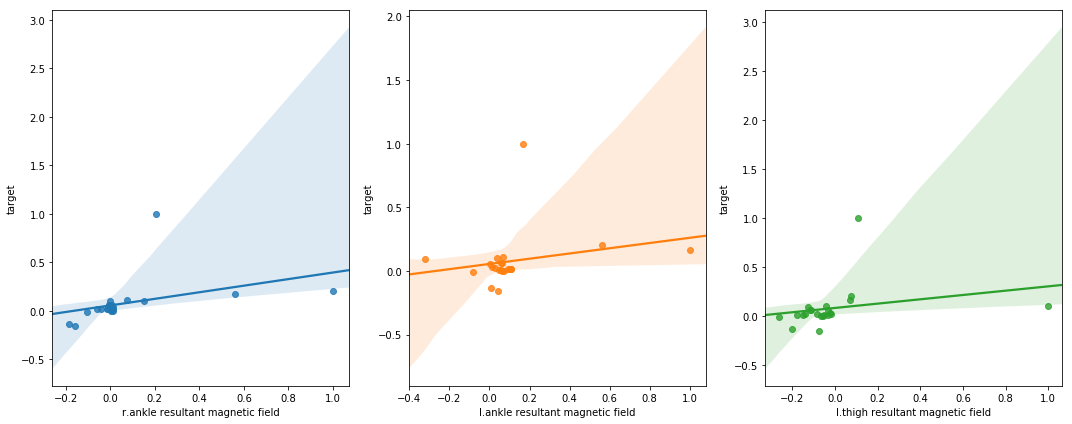

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,6))
sns.regplot(df_corr_resultant[best_corr_result_measures[0]],df_corr_resultant.target, ax=ax1)
sns.regplot(df_corr_resultant[best_corr_result_measures[1]],df_corr_resultant.target, ax=ax2)
sns.regplot(df_corr_resultant[best_corr_result_measures[2]],df_corr_resultant.target, ax=ax3)
plt.tight_layout()

## Getting interval around peak

In [29]:
# define the sensor to be used as primary to identify the moment of the fall, based on its value peak
main_sensor = 'waist'

In [30]:
# interval in seconds to be used around the peak to collect the data
interval = 4.0

### Getting the peak

The peak will be picked based on the acceleration resultant measure of the sensor defined in the variable "main_variable"

In [31]:
column_with_peak = main_sensor + ' resultant acceleration'
column_with_peak

'waist resultant acceleration'

In [32]:
df_around_peaks = df.copy()

In [33]:
list_dfs_with_peaks = []
files = list(df.FileName.unique())
id_column_time_seconds = df.columns.get_loc("time_seconds")
for file in files:
    df_file = df[df.FileName == file]
    index_peak = df_file[column_with_peak].idxmax()
    seconds_peak = df_file.iloc[index_peak,id_column_time_seconds]
    list_dfs_with_peaks.append(df_file[
                                    (df_file.time_seconds >= seconds_peak - interval/2) &
                                    (df_file.time_seconds <= seconds_peak + interval/2)])
df_around_peaks = pd.concat(list_dfs_with_peaks, axis=0)    

# Plot filtered data

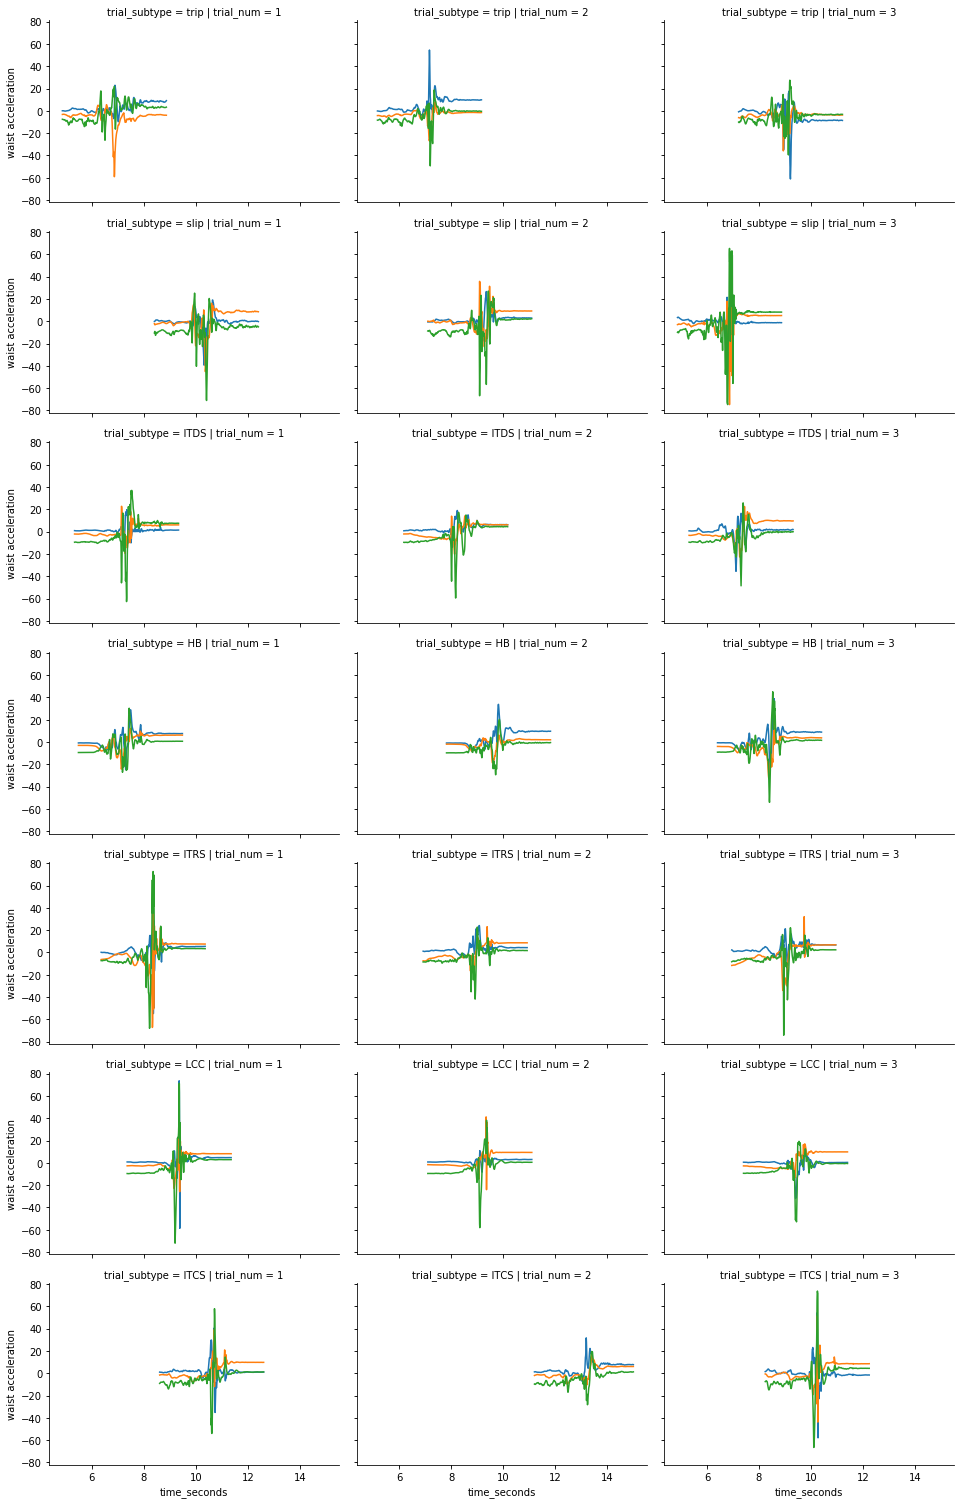

In [62]:
plot_facedgrid_by_trial_type(df_around_peaks, trial_type='Falls', subject=1, location='waist', measure='acceleration')    

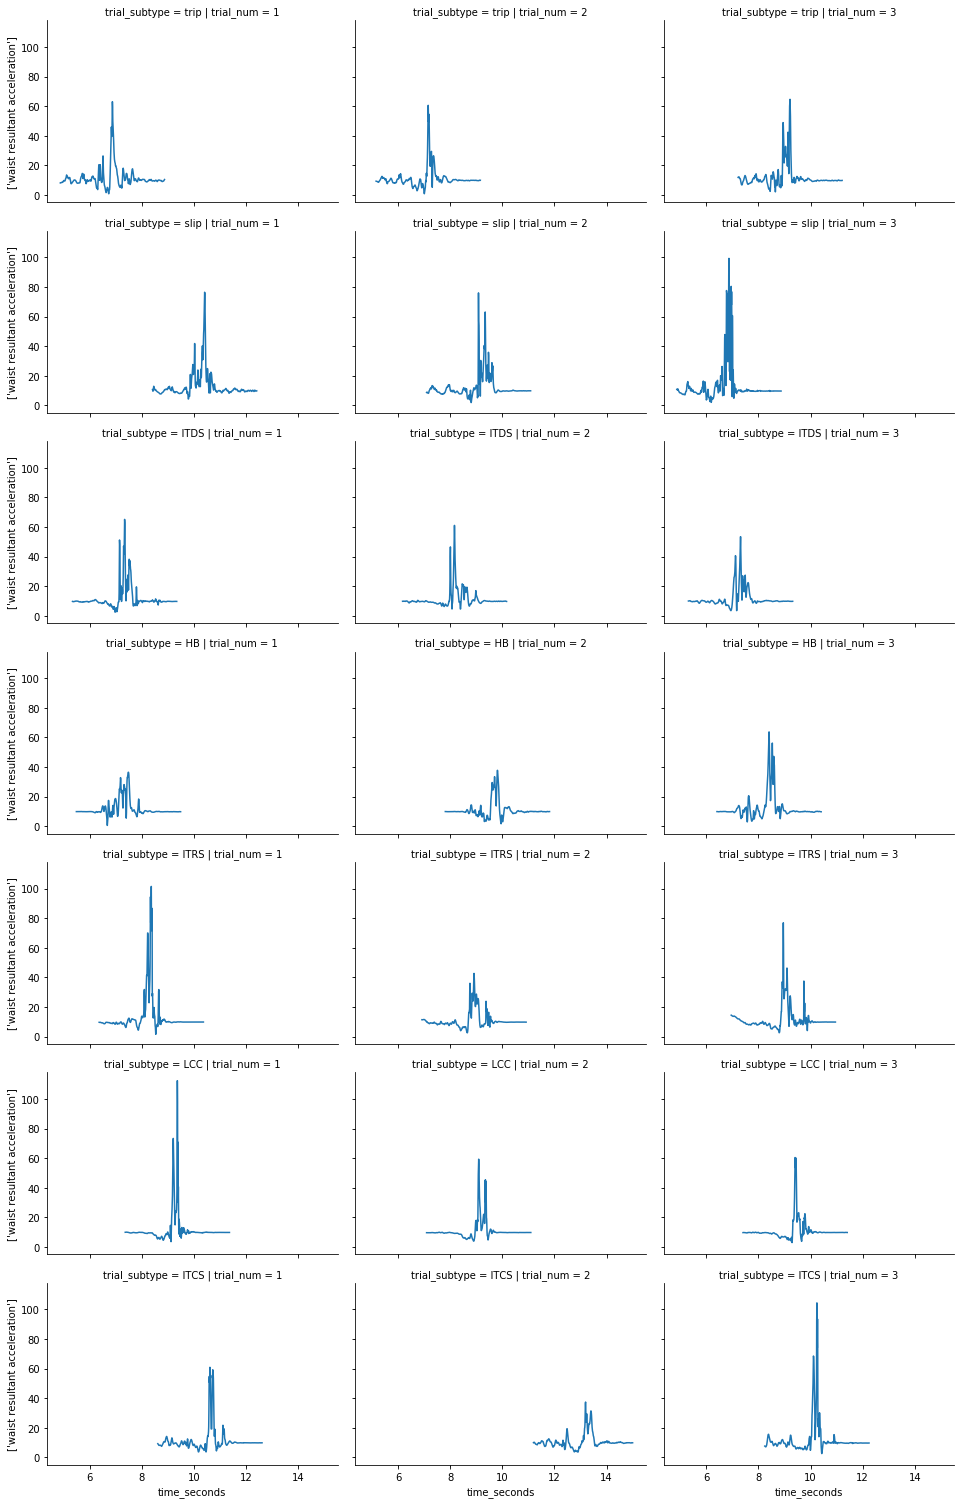

In [63]:
plot_facedgrid_by_resultant_values(df_around_peaks, trial_type='Falls', subject=1, location='waist', measure='acceleration')  

# Repeat correlation analysis

In [42]:
numerical_columns_raw = list(meta[(meta.body_location != '') & (meta.axis != 'XYZ')].index) + ['target']
threshold_correlation_raw_measures = 0.3

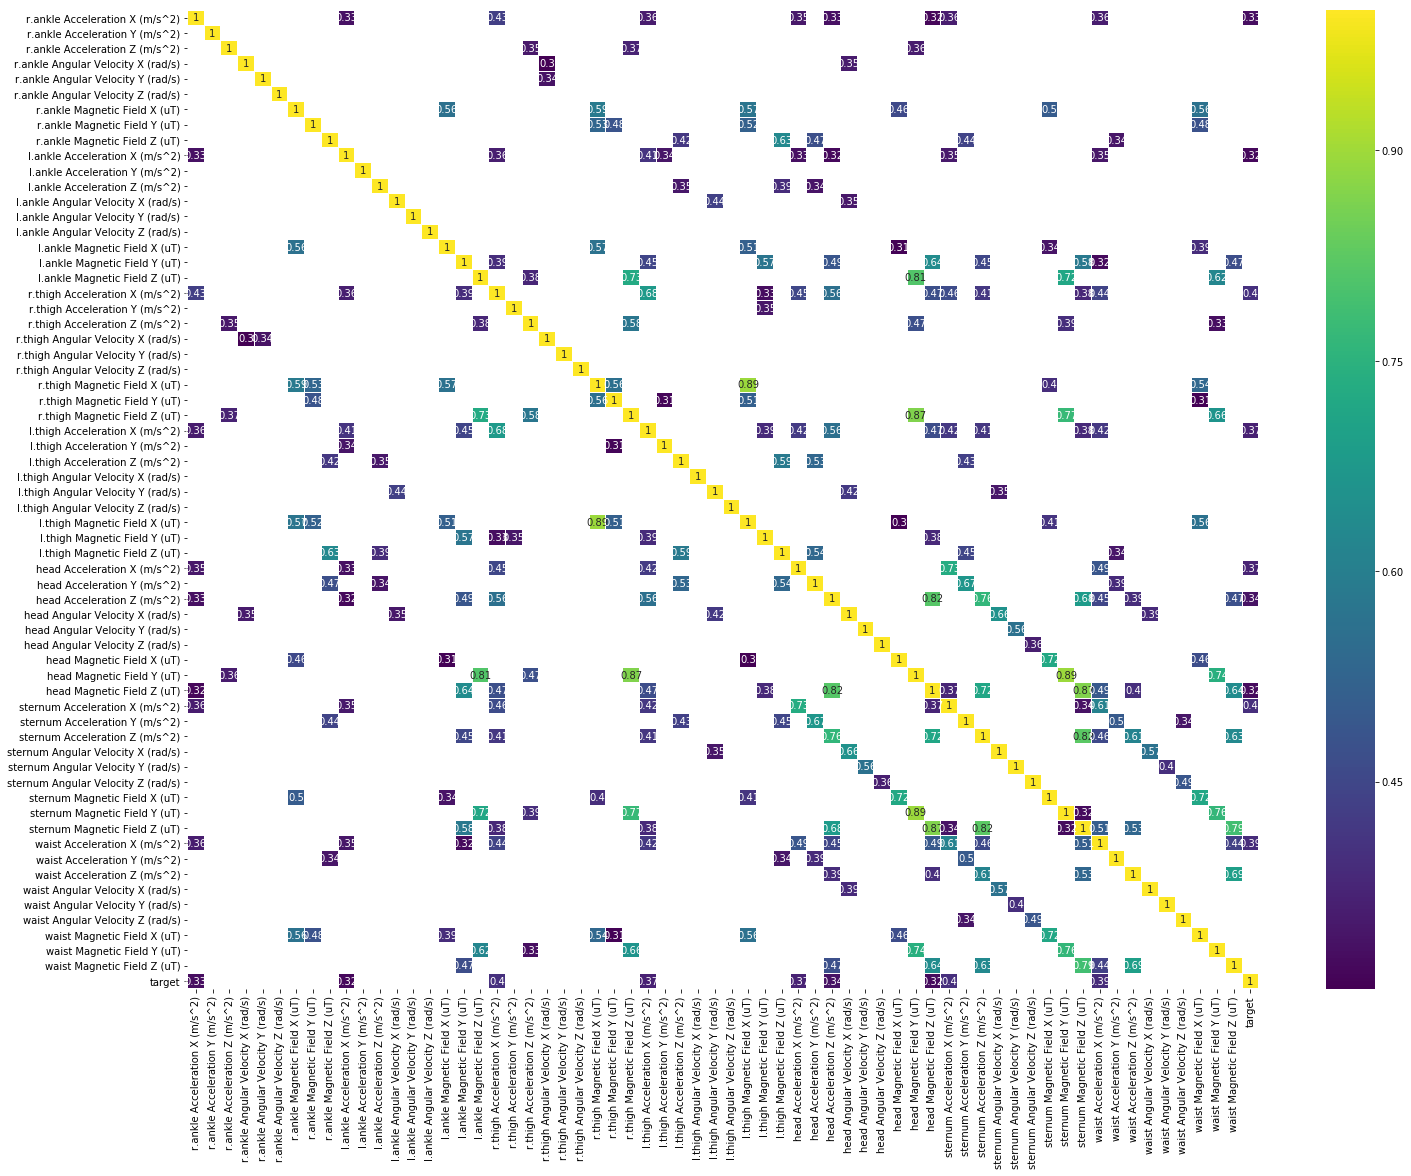

In [43]:
df_corr_raw = plot_correlation_heatmap(df_around_peaks, numerical_columns_raw, threshold_correlation_raw_measures)

In [44]:
best_corr_raw_measures = list(df_corr_raw[(df_corr_raw >= threshold_correlation_raw_measures)]['target'].dropna().drop('target').index)

print("Readings with HIGHEST correlation with target:")
      
for measure in best_corr_raw_measures:
    print(' - '+measure)

Readings with HIGHEST correlation with target:
 - r.ankle Acceleration X (m/s^2)
 - l.ankle Acceleration X (m/s^2)
 - r.thigh Acceleration X (m/s^2)
 - l.thigh Acceleration X (m/s^2)
 - head Acceleration X (m/s^2)
 - head Acceleration Z (m/s^2)
 - head Magnetic Field Z (uT)
 - sternum Acceleration X (m/s^2)
 - waist Acceleration X (m/s^2)


# Resultant data

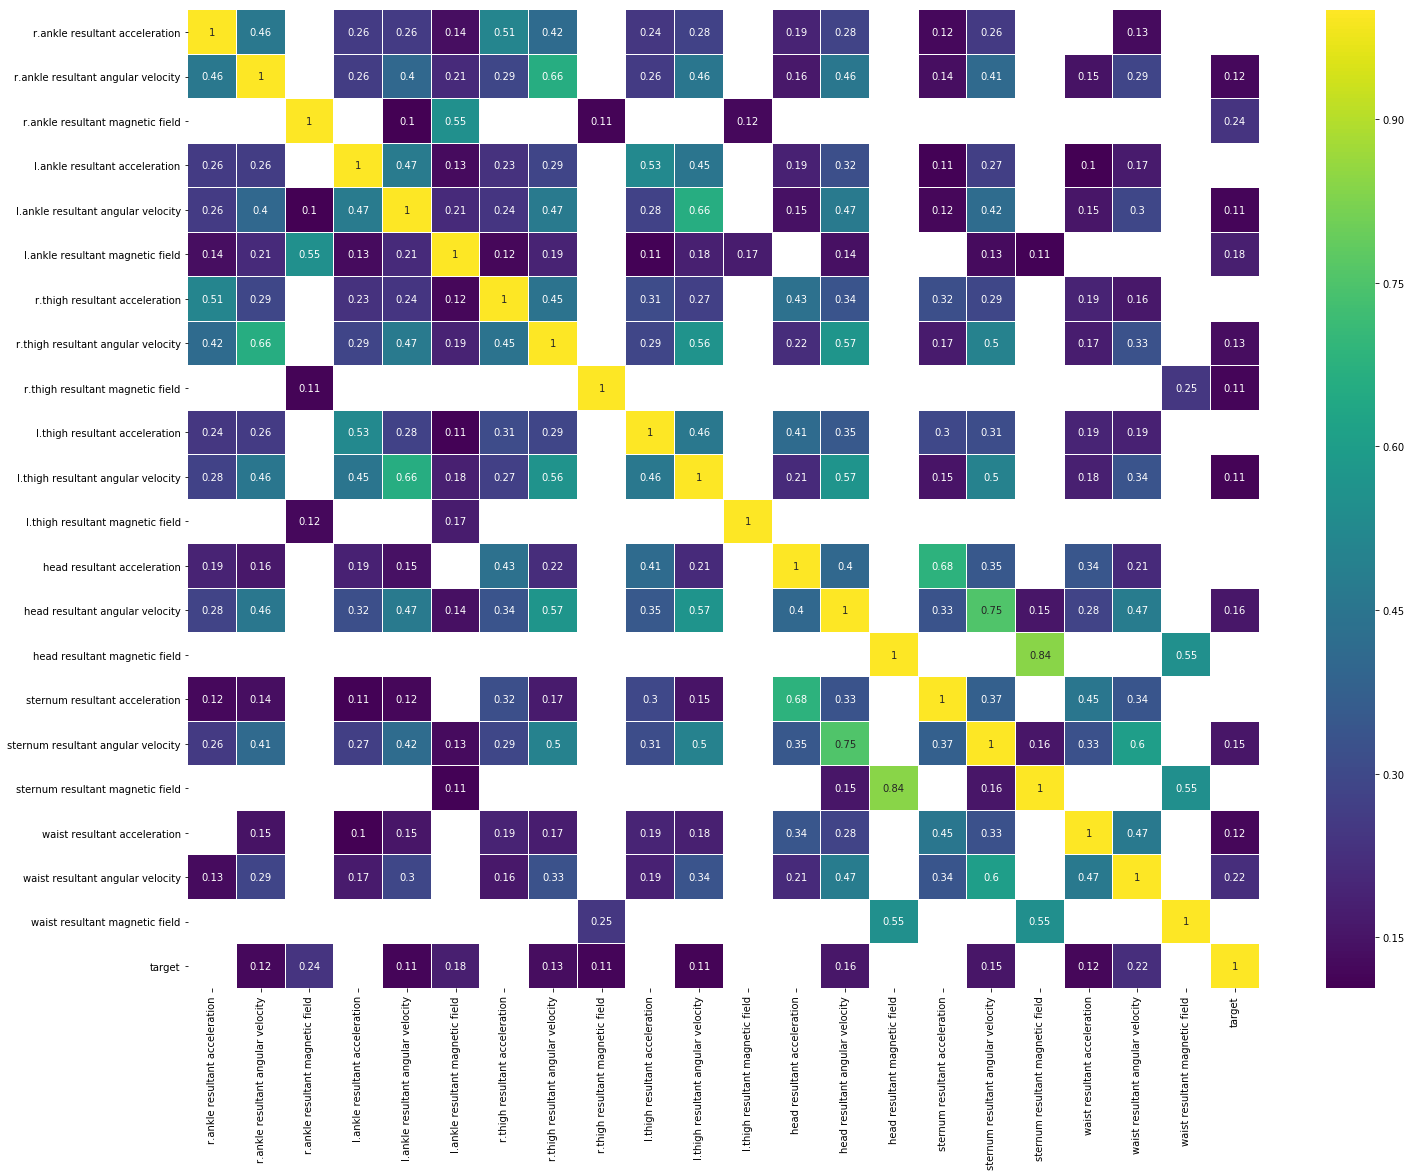

In [52]:
numerical_columns_resultant = list(meta[meta.axis == 'XYZ'].index) + ['target']
threshold_correlation_resultant_measures = 0.1

df_corr_resultant = plot_correlation_heatmap(df_around_peaks, numerical_columns_resultant, threshold_correlation_resultant_measures)

In [53]:
best_corr_result_measures = list(df_corr_resultant[(df_corr_resultant >= threshold_correlation_resultant_measures)]['target'].dropna().drop('target').index)

print("Readings with HIGHEST correlation with target:")
      
for measure in best_corr_result_measures:
    print(' - '+measure)

Readings with HIGHEST correlation with target:
 - r.ankle resultant angular velocity
 - r.ankle resultant magnetic field
 - l.ankle resultant angular velocity
 - l.ankle resultant magnetic field
 - r.thigh resultant angular velocity
 - r.thigh resultant magnetic field
 - l.thigh resultant angular velocity
 - head resultant angular velocity
 - sternum resultant angular velocity
 - waist resultant acceleration
 - waist resultant angular velocity


# <font color='red'>Conclusions about the use of data around peak</font>

Using raw readings with complete dataset:

Measurements with correlation > 0.3 to the Target:

 - r.ankle Acceleration X (m/s^2)
 - r.thigh Acceleration X (m/s^2)
 - l.thigh Acceleration X (m/s^2)
 - head Acceleration X (m/s^2)
 - sternum Acceleration X (m/s^2)
 - waist Acceleration X (m/s^2)
 
Using resultant readings with complete dataset:
 
Measurements with correlation > 0.1 to the Target:
 
 - r.ankle resultant magnetic field
 - l.ankle resultant magnetic field
 - l.thigh resultant magnetic field
 
 OBS: no resultant measure have a correlation > 0.3 with the target
 
Using data around peak (4 seconds):
 
Measurements with correlation > 0.3 to the Target:
 
 - r.ankle Acceleration X (m/s^2)
 - l.ankle Acceleration X (m/s^2)
 - r.thigh Acceleration X (m/s^2)
 - l.thigh Acceleration X (m/s^2)
 - head Acceleration X (m/s^2)
 - head Acceleration Z (m/s^2)
 - head Magnetic Field Z (uT)
 - sternum Acceleration X (m/s^2)
 - waist Acceleration X (m/s^2)
 
Measurements with correlation > 0.1 to the Target:
 
 - r.ankle resultant angular velocity
 - r.ankle resultant magnetic field
 - l.ankle resultant angular velocity
 - l.ankle resultant magnetic field
 - r.thigh resultant angular velocity
 - r.thigh resultant magnetic field
 - l.thigh resultant angular velocity
 - head resultant angular velocity
 - sternum resultant angular velocity
 - waist resultant acceleration
 - waist resultant angular velocity
 
 OBS: still no resultant measure have a correlation > 0.3 with the target